
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.23.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

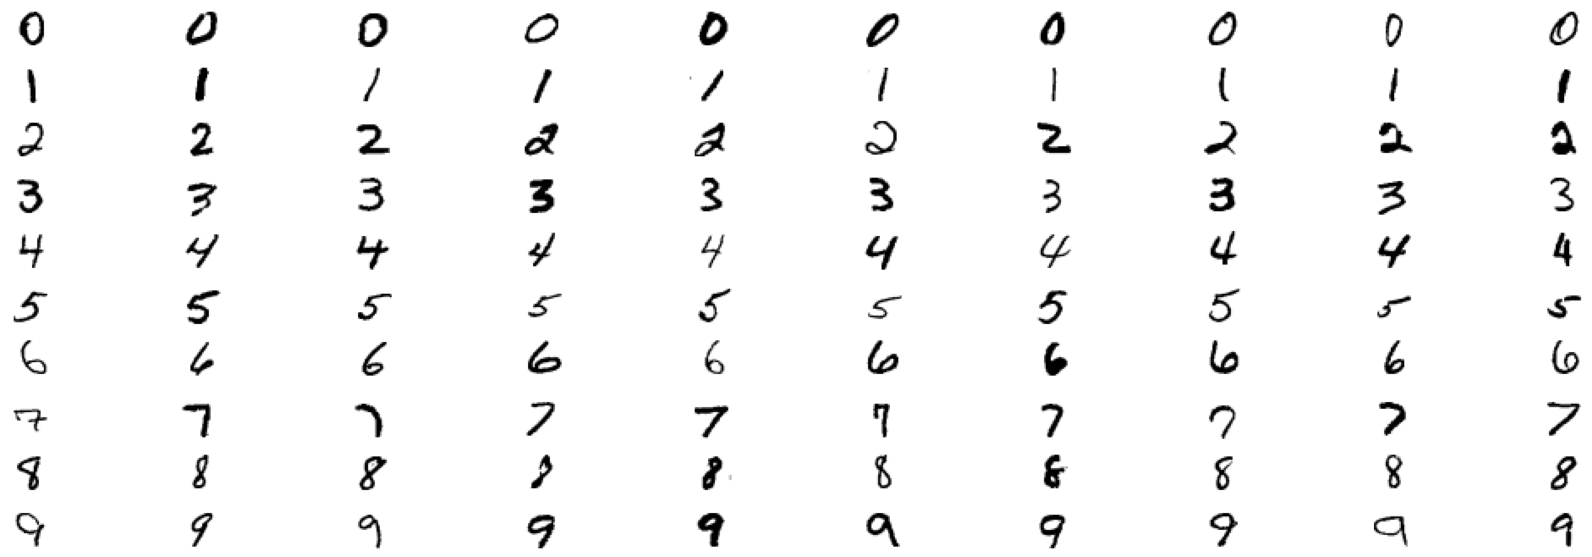

In [149]:
def Q1(num_examples=10):
  ### STUDENT START ###
    figure = plt.figure(figsize=(30, 10))
    cnt = 1 
    for i in range(num_examples): 
        for j in range(10):        
            # Get the index of where the train label equals the current postion for the figure plot
            idx = np.argwhere(train_labels == str(i))[j]
            # You can use np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering).
            img = np.reshape(train_data[idx], (28, 28))
            # You can use plt.subplot() for creating subplots.
            axes = figure.add_subplot(num_examples, 10, cnt) #Show a 10x10 grid that visualizes 10 examples of each digit = 10.
            axes.set_axis_off() 
            # You can use plt.imshow() for rendering a matrix.
            axes.imshow(img, cmap='gray_r') # You can use cmap for setting the colormap, for example to black and white. (choose reverse gray)      
            # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
            cnt+= 1    
    plt.show()
  ### STUDENT END ###
Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [5]:
def Q2(k_values):

### STUDENT START ###
    df = pd.DataFrame (columns = ['k', 'Accuracy','Score']) 
    for k in k_values:
        # 1. Produce a 1-Nearest Neighbor model
        knn = KNeighborsClassifier(k) 
        knn.fit(mini_train_data, mini_train_labels) 
        #Evaluate performance on the dev set
        model = knn.predict(dev_data) 
        accuracy = np.sum([1 for j in range(model.shape[0]) if model[j] == dev_labels[j]]) / model.shape[0]
        
        # 2. Print the accuracy of each model. 
        knn_score = knn.score(mini_train_data, mini_train_labels)        

        df.loc[-1] = [str(k), accuracy, knn_score]  # adding a row
        df.index = df.index + 1  # shifting index
        df = df.sort_index()  # sorting by index   
        
    print("\n\x1b[1m 1. Produce a 1-Nearest Neighbor model. \x1b[m")
    print("\n\x1b[1m 2. Print the accuracy of each model. \x1b[m")
    print("\n\x1b[1m    Check out what the function \"score\" does..\n \x1b[m")    
    print(df)
    
    # 3. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label.
    print("\n\x1b[1m 3. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label.\n \x1b[m")
    print("classification report for k = 1")
    print(classification_report(dev_labels, model))
    # let's grab the data in the form of a ditionary so we can slice it to answer the below questions
    data = classification_report(dev_labels, model, output_dict = True)
    
    # 4. Which digit is the most difficult for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?
    print("\n\x1b[1m 4. Which digit is the most difficult for the 1-Nearest Neighbor model to classify correctly?\n \x1b[m")
    lst = [(idx, v['f1-score']) for idx, v in data.items() if idx[0].isnumeric()]
    digit = min(lst, key=lambda x: x[1])[0]
    print("     " + str(digit))

    print("\n\x1b[1m    How did you choose and why?\n \x1b[m")
    # https://en.wikipedia.org/wiki/F-score
    print("     Using the F1-Score we can see the lowest value show which is the most difficult to classify")
    print("     The lower the F1-Score the lower the accuracy of that classification")            
    print("     https://en.wikipedia.org/wiki/F-score")

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)


 1. Produce a 1-Nearest Neighbor model. 

 2. Print the accuracy of each model. 

    Check out what the function "score" does..
 
   k  Accuracy  Score
0  9     0.875  0.901
1  7     0.877  0.912
2  5     0.882  0.917
3  3     0.876  0.944
4  1     0.884  1.000

 3. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label.
 
classification report for k = 1
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.78      0.99      0.87       118
           2       0.97      0.69      0.81       106
           3       0.87      0.91      0.89        97
           4       0.92      0.87      0.89        92
           5       0.96      0.85      0.90        88
           6       0.91      0.92      0.92       102
           7       0.80      0.94      0.86       102
           8       0.82      0.78      0.80        94
           9       0.85      0.82      0.83        9

Answer to part 4: This was printed as an output above

<b> 4. Which digit is the most difficult for the 1-Nearest Neighbor model to classify correctly? </b>
 
     8

<b>    How did you choose and why?</b>
 
     Using the F1-Score we can see the lowest value show which is the most difficult to classify
     
     The lower the F1-Score the lower the accuracy of that classification
     
     https://en.wikipedia.org/wiki/F-score

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

   Train Size  Accuracy  Train Time  Accuracy Time
8       100.0     0.702    0.113999       0.001001
7       200.0     0.791    0.202000       0.000000
6       400.0     0.811    0.382000       0.000000
5       800.0     0.866    0.783000       0.000000
4      1600.0     0.905    1.648000       0.000000
3      3200.0     0.927    3.328507       0.001000
2      6400.0     0.939    6.715002       0.000000
1     12800.0     0.952   13.442511       0.000000
0     25600.0     0.963   26.902510       0.000999

 What do you see? Is this what you expected to see and why?
 
It takes more time to train then it does to measure accuracy. 
 I would expect this given the amount of operations needed to produce the predictive model vs measuring its accuracy which has far less operations algorithmically.



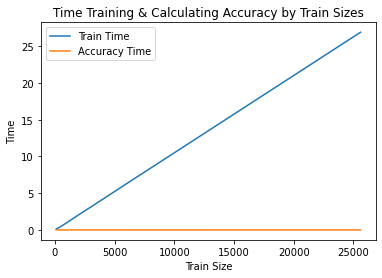

In [150]:
def Q3(train_sizes, accuracies):

### STUDENT START ###    
    df = pd.DataFrame (columns = ['Train Size','Accuracy','Train Time', 'Accuracy Time']) 
    for i in train_sizes:
        
        # 1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, train_data[:train_size].
        knn = KNeighborsClassifier(1)
        knn.fit(train_data[:i], train_labels[:i])  
        
        # 3. Show the time needed to:
        start_time = time.time() 
        #    A. Train each model.
        model = knn.predict(dev_data)
        train_time = time.time() - start_time
                
        #    B. Measure the accuracy of each model.
        start_time = time.time() 
        accuracy = np.sum([1 for j in range(model.shape[0]) if model[j] == dev_labels[j]]) / model.shape[0] # sum(model==dev_labels) / model.shape[0]
        accuracy_time = time.time()  - start_time              
        
        # for external parameters to be used in proceeding sections of this notebook
        accuracies.append(accuracy)
        train_times.append(train_time)
        eval_times.append(accuracy_time)
        
        df.loc[-1] = [i, accuracy, train_time, accuracy_time] # adding a row
        df.index += 1  # shifting index  
        
    # 2. Evaluate and show the accuracy achieved by each model.
    print(df)     
    
    # 4. What do you see? Is this what you expected to see and why?
    print("\n\x1b[1m What do you see? Is this what you expected to see and why?\n \x1b[m")  
    print("It takes more time to train then it does to measure accuracy. \n I would expect this given the amount of operations needed to produce the predictive model vs measuring its accuracy which has far less operations algorithmically.\n") #TODO:
            
    # 5. Plot on the same graph (as a function of training size):        
    #    A. the time needed for training        
    #    B. the time needed for calculating accuracy 
    df.plot(x="Train Size", y=["Train Time", "Accuracy Time"])
    plt.title("Time Training & Calculating Accuracy by Train Sizes")
    plt.ylabel('Time')
    plt.xlabel('Train Size')
    plt.show()

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies)

Answer to part 4: What do you see? Is this what you expected to see and why?

It takes more time to train then it does to measure accuracy. 
 I would expect this given the amount of operations needed to produce the predictive model vs measuring its accuracy which has far less operations algorithmically.


### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.


 Linear Regression: 

 1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 

 2. Print  𝑅2  of the linear regression model. 
     𝑅^2 for linear regression model: 0.4177006634161019

 3. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000. 
     Train Set Size: 60000: , Accuracy: 1.2361731707874237, Fit: Over
     Train Set Size: 120000: , Accuracy: 1.637428053637104, Fit: Over
     Train Set Size: 1000000: , Accuracy: 7.522499668765751, Fit: Over

 4. Plot on a lineplot graph: 

     A. the actual accuracies we obtained in the previous question 

     B. and the accuracies our model predicted we would have gotten. 

     C. The X axis is the training set size. 

     D. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is. 


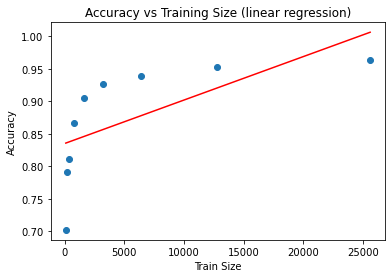


 5. What are two things that are wrong with our linear regression model? 
     1. For the linear regression model the accuracy exceeds greater than 1 for a training size of 60k+. 
 
     2. This model is also an issue as the relationship between training size to accuracy is not linear. 
 The training size grows more rapidly vs the accuracy gained.

 Log Transform: 

 6. Apply a log transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 

 7. Show  𝑅^2  of the improved linear regression log transform model. 
     𝑅^2 for linear regression log transform model: 0.8825621968324606

 8. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000. 
     Train Set Size: 60000: , Accuracy: 1.05055485396409, Fit: Over
     Train Set Size: 120000: , Accuracy: 1.0894531458233607, Fit: Over
     Train Set Size: 1000000: , Accuracy: 1.2176092784466082, Fit: Over

 9. Plot a lineplot graph of both again as before

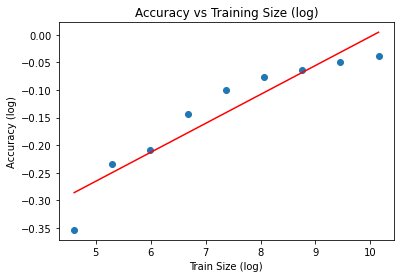


 What are things that are still wrong with our log transformed model? 
     1. What went wrong for this model is that the accuracy is still greater than 1 for a training size of 60k+ putting us in an over fit. Although much better than the linear regression only model it's still not good enough. 
 

 Logit Transform: 

 6. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 

 7. Show  𝑅^2  of the improved linear regression logit model. 
     𝑅^2 for linear regression logit transform model: 0.9220045425512831

 8. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000. 
     Train Set Size: 60000: , Accuracy: 0.929027110005323, Fit: Under
     Train Set Size: 120000: , Accuracy: 0.929273642950001, Fit: Under
     Train Set Size: 1000000: , Accuracy: 0.9294906715590755, Fit: Under

 9. Plot a lineplot graph of both again as before. 

     A. Be sure to plot this where the Y axis is ac

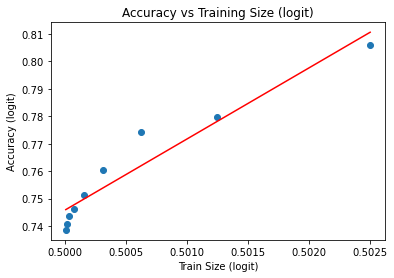


 What are things that are right with our logit transformed model? 
     1. What went right for this model is that the accuracy is less than 1 for a training size of 60k+ keeping us under fit.  
 


In [154]:
def Q4():

### STUDENT START ###
    
    print("\n\x1b[1m Linear Regression: \x1b[m")
    print("\n\x1b[1m 1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. \x1b[m")
    LR = LinearRegression() 
    # Using the output variables from Q3 which was for a kNN @ k = 1
    X = np.array(train_sizes).reshape(-1, 1)
    Y = np.array(accuracies).reshape(-1, 1)
    LR.fit(X, Y)     

    print("\n\x1b[1m 2. Print  𝑅2  of the linear regression model. \x1b[m")    
    print("     𝑅^2 for linear regression model: " + str(LR.score(X,Y)))
    
    print("\n\x1b[1m 3. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000. \x1b[m")
    for i in [60000, 120000, 1000000]:
        accuracy = LR.predict(np.array([[i]]))[0][0]
        print("     Train Set Size: " + str(i) + ": , Accuracy: " + str(accuracy) + ", Fit: " + ("Over" if accuracy > 1 else "Under"))
    
    print("\n\x1b[1m 4. Plot on a lineplot graph: \x1b[m")
    print("\n\x1b[1m     A. the actual accuracies we obtained in the previous question \x1b[m")    
    print("\n\x1b[1m     B. and the accuracies our model predicted we would have gotten. \x1b[m")
    print("\n\x1b[1m     C. The X axis is the training set size. \x1b[m")
    print("\n\x1b[1m     D. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is. \x1b[m")

    plt.scatter(train_sizes, accuracies)
    plt.title("Accuracy vs Training Size (linear regression)")
    plt.ylabel('Accuracy')
    plt.xlabel('Train Size')
    plt.plot(X, LR.predict(X), 'red')
    plt.show()
    
    print("\n\x1b[1m 5. What are two things that are wrong with our linear regression model? \x1b[m")
    print("     1. For the linear regression model the accuracy exceeds greater than 1 for a training size of 60k+. \n ") 
    print("     2. This model is also an issue as the relationship between training size to accuracy is not linear. \n The training size grows more rapidly vs the accuracy gained.")
        
    print("\n\x1b[1m Log Transform: \x1b[m")
    print("\n\x1b[1m 6. Apply a log transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. \x1b[m")       
    X = np.log(np.array(train_sizes).reshape(-1, 1))
    Y = np.log(np.array(accuracies).reshape(-1, 1))   
    LR.fit(X, Y)
    
    print("\n\x1b[1m 7. Show  𝑅^2  of the improved linear regression log transform model. \x1b[m") 
    print("     𝑅^2 for linear regression log transform model: " + str(LR.score(X,Y)))
    
    print("\n\x1b[1m 8. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000. \x1b[m")
    for i in [60000, 120000, 1000000]:
        accuracy = np.exp(LR.predict(np.log(np.array([[i]])))[0][0])
        print("     Train Set Size: " + str(i) + ": , Accuracy: " + str(accuracy) + ", Fit: " + ("Over" if accuracy > 1 else "Under"))
    
    print("\n\x1b[1m 9. Plot a lineplot graph of both again as before. \x1b[m")
    print("\n\x1b[1m     A. Be sure to plot this where the Y axis is accuracy and X axis is training set size, not the transformed space! \x1b[m")
    print("\n\x1b[1m     B. Choose the range of X and Y to visualize effectively. \x1b[m") 
    plt.scatter(X, Y)
    plt.title("Accuracy vs Training Size (log)")
    plt.ylabel('Accuracy (log)')
    plt.xlabel('Train Size (log)')
    plt.plot(X, LR.predict(X), 'red')
    plt.show()        
    
    print("\n\x1b[1m What are things that are still wrong with our log transformed model? \x1b[m")
    print("     1. What went wrong for this model is that the accuracy is still greater than 1 for a training size of 60k+ putting us in an over fit. Although much better than the linear regression only model it's still not good enough. \n ") 
    
    
    print("\n\x1b[1m Logit Transform: \x1b[m")
    
    print("\n\x1b[1m 6. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. \x1b[m")    
    logit = lambda x: np.exp(x)/(np.exp(x) + 1)
    logistic = lambda p: np.log(p/(1 - p))    
    X = logit(1/np.array(train_sizes).reshape(-1, 1))
    Y = logit(1/np.array(accuracies).reshape(-1, 1))   
    LR.fit(X, Y)
    
    print("\n\x1b[1m 7. Show  𝑅^2  of the improved linear regression logit model. \x1b[m") 
    print("     𝑅^2 for linear regression logit transform model: " + str(LR.score(X,Y)))
    
    print("\n\x1b[1m 8. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000. \x1b[m")
    for i in [60000, 120000, 1000000]:
        accuracy = 1/logistic(LR.predict(logit(1/np.array([[i]])))[0][0])
        print("     Train Set Size: " + str(i) + ": , Accuracy: " + str(accuracy) + ", Fit: " + ("Over" if accuracy > 1 else "Under"))
    
    print("\n\x1b[1m 9. Plot a lineplot graph of both again as before. \x1b[m")
    print("\n\x1b[1m     A. Be sure to plot this where the Y axis is accuracy and X axis is training set size, not the transformed space! \x1b[m")
    print("\n\x1b[1m     B. Choose the range of X and Y to visualize effectively. \x1b[m") 
    plt.scatter(X, Y)
    plt.title("Accuracy vs Training Size (logit)")
    plt.ylabel('Accuracy (logit)')
    plt.xlabel('Train Size (logit)')
    plt.plot(X, LR.predict(X), 'red')
    plt.show()
    
    print("\n\x1b[1m What are things that are right with our logit transformed model? \x1b[m")
    print("     1. What went right for this model is that the accuracy is less than 1 for a training size of 60k+ keeping us under fit.  \n ") 
    
### STUDENT END ###

Q4()

Answer to part 5:  

<b>For the standard linear regression model:</b>
1. For the linear regression model the accuracy exceeds greater than 1 for a training size of 60k+. <br>
 
2. This model is also an issue as the relationship between training size to accuracy is not linear. <br>
 The training size grows more rapidly vs the accuracy gained.<br> 

<b>For the log transformed model:</b>

What went wrong for this model is that the accuracy is still greater than 1 for a training size of 60k+ putting us in an over fit. Although much better than the linear regression only model it's still not good enough.

<b>For the logit transformed model:</b>

What went right for this model is that the accuracy is less than 1 for a training size of 60k+ keeping us under fit. 


### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.


 1. Produce a 1-Nearest Neighbor model.
 
Using KNeighborsClassifier with a train set size of 10000


 2a. Show the confusion matrix
 
[[104   0   0   1   0   0   0   0   1   0]
 [  0 117   0   0   0   0   0   0   1   0]
 [  1   0 102   1   0   0   0   2   0   0]
 [  0   1   0  87   0   3   0   2   4   0]
 [  0   0   0   0  88   0   0   0   0   4]
 [  1   0   0   1   0  81   4   0   0   1]
 [  0   2   0   0   0   1  99   0   0   0]
 [  0   0   1   0   1   0   0 100   0   0]
 [  0   2   2   4   1   1   2   0  80   2]
 [  0   1   0   0   3   0   0   0   0  91]]

 2b. Evaluate performance on the dev set, using F1 scores for precision and recall 
 
F1-score (0): 0.9811320754716981
F1-score (1): 1.1037735849056605
F1-score (2): 0.9622641509433962
F1-score (3): 0.8207547169811321
F1-score (4): 0.8301886792452831
F1-score (5): 0.7641509433962265
F1-score (6): 0.9339622641509434
F1-score (7): 0.9433962264150944
F1-score (8): 0.7547169811320754
F1-score (9): 0.8584905660377359

 3. Which digit

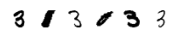

In [158]:
def Q5():

### STUDENT START ###
  
    # 1. Produce a 1-Nearest Neighbor model
    print("\n\x1b[1m 1. Produce a 1-Nearest Neighbor model.\n \x1b[m")
    knn = KNeighborsClassifier(1)
    set_size = 10000
    knn.fit(train_data[:set_size], train_labels[:set_size]) 
    print("Using KNeighborsClassifier with a train set size of " + str(set_size) + "\n")
    
    # Train on the mini train set
    model = knn.predict(dev_data)
    conf_matrix = confusion_matrix(dev_labels, model)
  
    # 2. Show the confusion matrix
    print("\n\x1b[1m 2a. Show the confusion matrix\n \x1b[m")
    print(conf_matrix)  
  
    # Evaluate performance on the dev set, using F1 scores for precision and recall
    print("\n\x1b[1m 2b. Evaluate performance on the dev set, using F1 scores for precision and recall \n \x1b[m")
    
    # we could use the following "from sklearn.metrics import f1_score" or the classification report with dict output ...
    # however I wanted to create from scratch
    F = lambda x, y: x / sum([1 for i in y if i == '0']) # precision or recall eq    
    F1_score = lambda v, p, r: 2 * (F(v, p) * F(v, r)) / (F(v, p) + F(v, r))
    
    f1_scores = {i:F1_score(conf_matrix[i][i], dev_labels, model) for i in range(0, 10)}
    for i, j in f1_scores.items(): 
        print("F1-score (" + str(i) + "): " + str(j))

    # 3. Which digit does the model most often confuse with which digit? 
    l_score, l_digit = min(zip(f1_scores.values(), f1_scores.keys()))
    print("\n\x1b[1m 3. Which digit does the model most often confuse with which digit?\n \x1b[m")
    print("     digit (", l_digit, ") with a score value of (", l_score, ")")
    
    # 4. Show examples of the misclassified digit.
    print("\n\x1b[1m 4. Show examples of the misclassified digit.\n \x1b[m")
    fig = plt.figure() 
    cnt = 1
    for i, j in enumerate(model):
        if j == str(l_digit) and model[i] != dev_labels[i]: 
            ax = fig.add_subplot(1, 12, cnt) 
            ax.set_axis_off()
            ax.imshow(np.reshape(dev_data[i],(28,28)), cmap='gray_r')
            cnt += 1
            
### STUDENT END ###

Q5()


Answer to part 3: 

from the output above:

3. Which digit does the model most often confuse with which digit?
 
digit ( 8 ) with a score value of ( 0.7547169811320754 )
